<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Vedant\AppData\Local\Temp\ipykernel_31096\297036955.py:13: SyntaxWarning: invalid escape sequence '\d'
  df["price"] = df["price"].str.extract("(\d+)").astype(float)


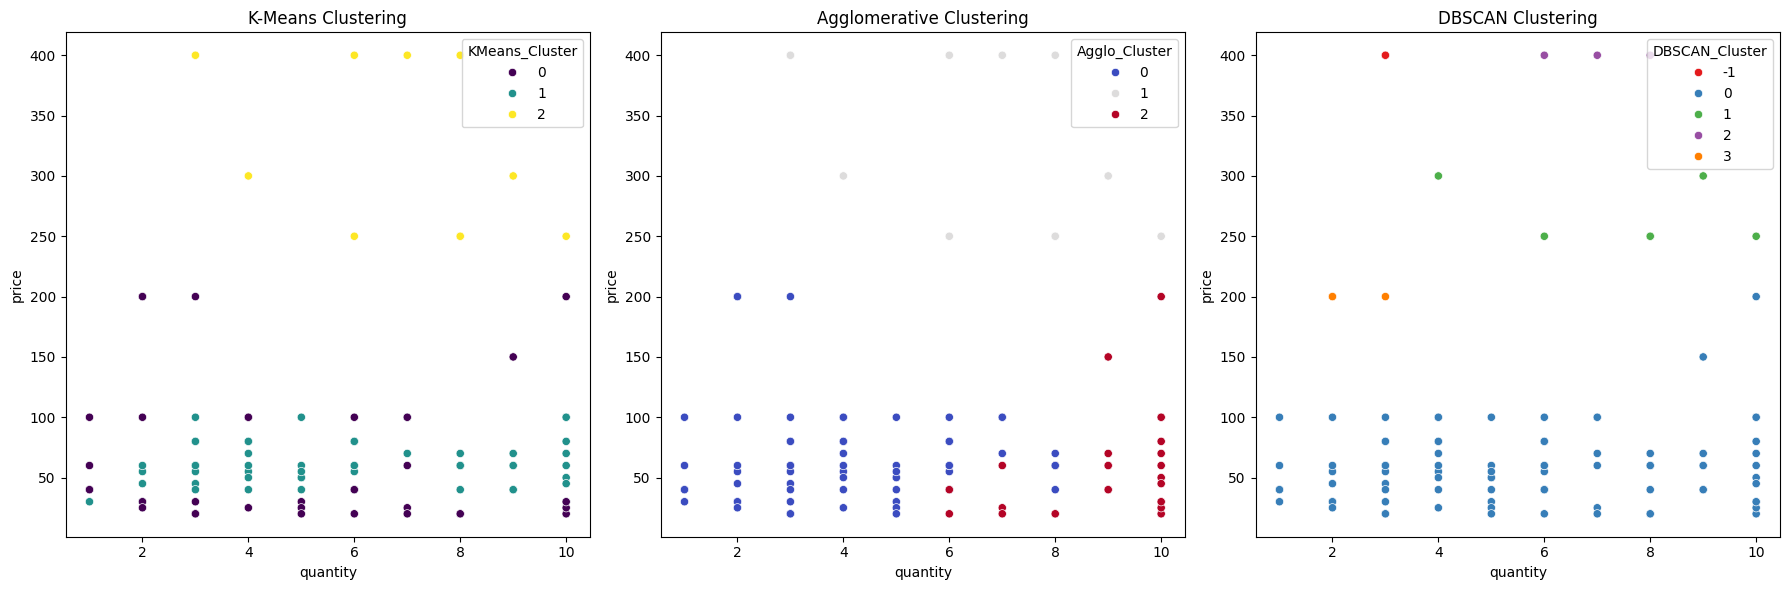

       Algorithm  Silhouette Score (Higher Better)  \
0        K-Means                          0.388848   
1  Agglomerative                          0.339670   
2         DBSCAN                          0.239619   

   Davies-Bouldin Score (Lower Better)  
0                             1.032704  
1                             1.081007  
2                             0.692069  
Segmented data saved to 'segmented_customers_with_algorithms.csv'


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load CSV Data
df = pd.read_csv("customer_orders.csv")

# Convert price to numeric (extract only the number from "50 per kg")
df["price"] = df["price"].str.extract("(\d+)").astype(float)

# Encode categorical variables
encoder = LabelEncoder()
df["category"] = encoder.fit_transform(df["category"])
df["status"] = encoder.fit_transform(df["status"])

# Select features for clustering
features = df[["quantity", "price", "category"]]

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# ------------------- Clustering Algorithms -------------------

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(scaled_features)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
df["Agglo_Cluster"] = agglo.fit_predict(scaled_features)

# DBSCAN Clustering
dbscan = DBSCAN(eps=1, min_samples=3)  # Adjust parameters as needed
df["DBSCAN_Cluster"] = dbscan.fit_predict(scaled_features)

# ------------------- Evaluation Metrics -------------------

# Silhouette Score (Higher is better)
silhouette_kmeans = silhouette_score(scaled_features, df["KMeans_Cluster"])
silhouette_agglo = silhouette_score(scaled_features, df["Agglo_Cluster"])
silhouette_dbscan = silhouette_score(scaled_features[df["DBSCAN_Cluster"] != -1], df[df["DBSCAN_Cluster"] != -1]["DBSCAN_Cluster"]) if len(set(df["DBSCAN_Cluster"])) > 1 else -1

# Davies-Bouldin Score (Lower is better)
db_kmeans = davies_bouldin_score(scaled_features, df["KMeans_Cluster"])
db_agglo = davies_bouldin_score(scaled_features, df["Agglo_Cluster"])
db_dbscan = davies_bouldin_score(scaled_features[df["DBSCAN_Cluster"] != -1], df[df["DBSCAN_Cluster"] != -1]["DBSCAN_Cluster"]) if len(set(df["DBSCAN_Cluster"])) > 1 else -1

# ------------------- Visualizations -------------------

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# K-Means Plot
sns.scatterplot(x=df["quantity"], y=df["price"], hue=df["KMeans_Cluster"], palette="viridis", ax=axes[0])
axes[0].set_title("K-Means Clustering")

# Agglomerative Plot
sns.scatterplot(x=df["quantity"], y=df["price"], hue=df["Agglo_Cluster"], palette="coolwarm", ax=axes[1])
axes[1].set_title("Agglomerative Clustering")

# DBSCAN Plot
sns.scatterplot(x=df["quantity"], y=df["price"], hue=df["DBSCAN_Cluster"], palette="Set1", ax=axes[2])
axes[2].set_title("DBSCAN Clustering")

plt.tight_layout()
plt.show()

# ------------------- Comparison Table -------------------

comparison_df = pd.DataFrame({
    "Algorithm": ["K-Means", "Agglomerative", "DBSCAN"],
    "Silhouette Score (Higher Better)": [silhouette_kmeans, silhouette_agglo, silhouette_dbscan],
    "Davies-Bouldin Score (Lower Better)": [db_kmeans, db_agglo, db_dbscan]
})

print(comparison_df)

# Save the segmented data
df.to_csv("segmented_customers_with_algorithms.csv", index=False)
print("Segmented data saved to 'segmented_customers_with_algorithms.csv'")
